# ✅ Step 1: Install Dependencies (Only Needed in Google Colab)

In [ ]:
!pip install opencv-python matplotlib numpy

# ✅ Step 2: Import Required Libraries

In [ ]:
import cv2
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import os

# ✅ Step 3: Define the File Path (Colab Path)

In [ ]:
image_path = "/content/5Marla_GF_FP_002_V01.png"  # Ensure the file exists in /content/

# ✅ Step 4: Define Room Color Mapping

In [ ]:
# RGB color coding for rooms
color_map = {
    "Bedroom": (255, 0, 0),                # Red
    "Bathroom": (0, 0, 255),               # Blue
    "Kitchen": (255, 165, 0),              # Orange
    "Drawing Room": (0, 128, 0),           # Green
    "Garage": (165, 42, 42),               # Brown
    "Lounge": (255, 255, 0),               # Yellow
    "Backyard": (50, 205, 50),             # Lime Green
    "Stairs": (0, 128, 128),               # Teal
    "Store": (128, 0, 128),                # Purple
    "Open Space": (0, 255, 255),           # Cyan
    "Prayer Room": (127, 127, 127),        # Crimson
    "Staircase": (153, 51, 255),           # RGB(153, 51, 255)
    "Lobby": (255, 0, 255),                # Magenta
    "Lawn": (64, 224, 208),                # Turquoise
    "Dining": (255, 192, 203),             # Pink
    "Servant Quarters": (75, 0, 130),      # Indigo
    "Passage": (128, 128, 0),              # Olive Green
    "Laundry": (230, 230, 250),            # Lavender
    "Dressing Area": (255, 127, 80),       # Coral
    "Side Garden": (255, 215, 0),          # Gold
    "Library": (255, 191, 0),              # Amber
    "Wall": (0, 0, 0),                     # Black
    "Door": (128, 0, 0),                   # Mahogany
}


# ✅ Step 5: Define Helper Function for Displaying Images

In [ ]:
def display_image(image, title="Image", figsize=(6, 6), is_bgr=True):
    """
    Displays an image using Matplotlib.
    """
    if is_bgr:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.axis("off")
    plt.title(title)
    plt.show()

# ✅ Step 6: Load & Process the Image

In [ ]:
def process_floor_plan(fp_path):
    """
    Processes a single floor plan and displays results at runtime.
    """
    file_name = os.path.basename(fp_path)  # Extract filename from path
    file_base, file_ext = os.path.splitext(file_name)  # Extract base filename without extension

    # Extract metadata from file name
    file_parts = file_base.split("_")
    if len(file_parts) < 5:
        print(f"❌ Skipping invalid file name: {file_name}")
        return

    # Extract meaningful metadata
    plot_size, floor_level, plan_type, fp_number, version = file_parts[:5]

    # Load the image
    img = cv2.imread(fp_path)
    if img is None:
        print(f"❌ Error loading image: {fp_path}")
        return

    # Display Original Image
    display_image(img, title="Original Floor Plan")

    # Resize image while maintaining aspect ratio
    target_width, target_height = 512, 928
    resized_img = cv2.resize(img, (target_width, target_height))

    # Normalize pixel values
    normalized_img = resized_img / 255.0

    # Display resized image
    display_image(resized_img, title=f"Resized Floor Plan ({target_width}x{target_height})")

    # Detect rooms and create masks
    detected_rooms = {}
    for room, color in color_map.items():
        bgr_color = color[::-1]  # Convert RGB to BGR for OpenCV
        mask = cv2.inRange(resized_img, np.array(bgr_color) - 10, np.array(bgr_color) + 10)

        if cv2.countNonZero(mask) > 0:
            detected_rooms[room] = mask
            display_image(mask, title=f"{room} Mask", is_bgr=False)

    # Generate metadata
    metadata = {
        "PlotSize": plot_size,
        "FloorLevel": floor_level,
        "PlanType": plan_type,
        "FP_Number": fp_number,
        "Version": version,
        "ImageDimensions": {"Width": target_width, "Height": target_height},
        "DPI": 96,
        "AspectRatio": round(target_width / target_height, 3),
        "ScalingFactor": 0.0045,
        "ProcessingDate": datetime.utcnow().isoformat(),
        "DetectedRooms": list(detected_rooms.keys()),
        "RoomDetails": []
    }

    # Calculate room areas
    print("\n📌 **Detected Rooms & Areas:**")
    for room, mask in detected_rooms.items():
        area_px = cv2.countNonZero(mask)
        area_sqft = area_px * metadata["ScalingFactor"]
        metadata["RoomDetails"].append({
            "RoomType": room,
            "AreaInPixels": area_px,
            "ApproxAreaInSqFt": round(area_sqft, 2)
        })
        print(f"✅ {room}: {round(area_sqft, 2)} sq ft ({area_px} pixels)")

    # Display metadata summary
    print("\n📌 **Extracted Metadata from Filename:**")
    print(f"✅ Plot Size: {plot_size}")
    print(f"✅ Floor Level: {floor_level}")
    print(f"✅ Plan Type: {plan_type}")
    print(f"✅ Floor Plan Number: {fp_number}")
    print(f"✅ Version: {version}")

    print("\n📌 **Complete Metadata JSON:**")
    print(json.dumps(metadata, indent=4))

    print(f"\n✅ Processing Complete for: {file_name}")



# ✅ Step 7: Run Processing Function on the Image

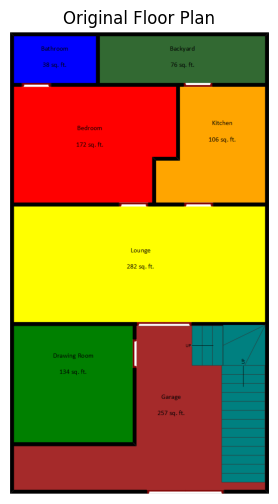

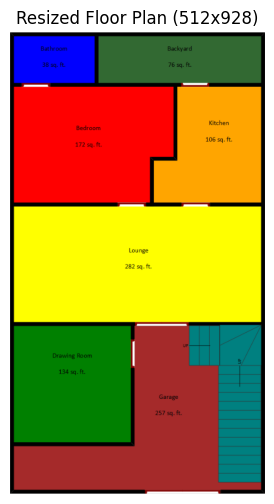

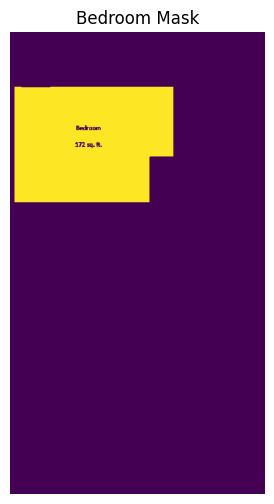

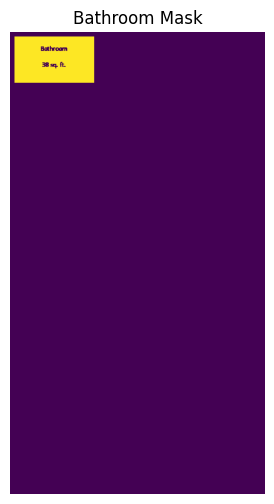

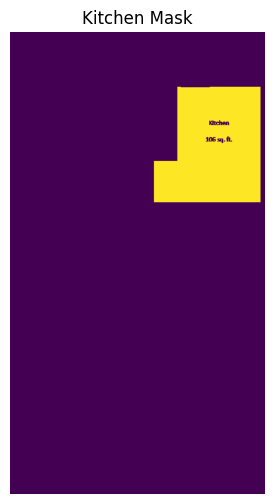

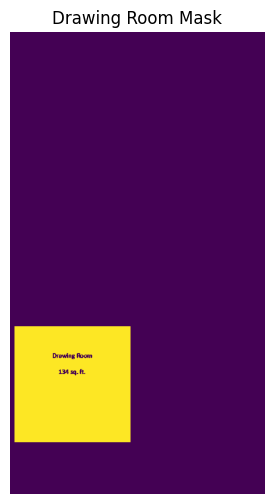

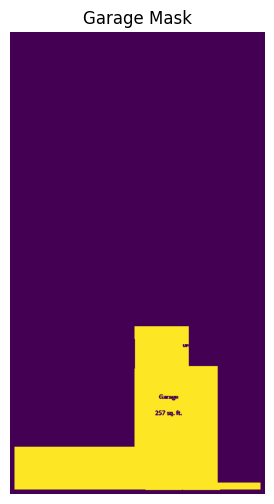

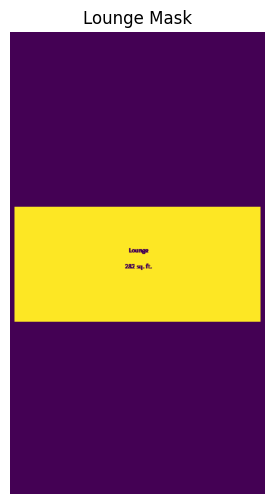

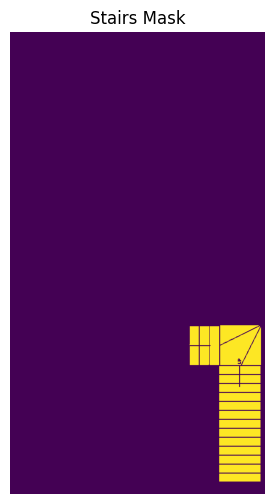

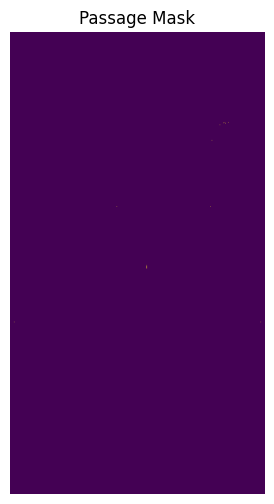

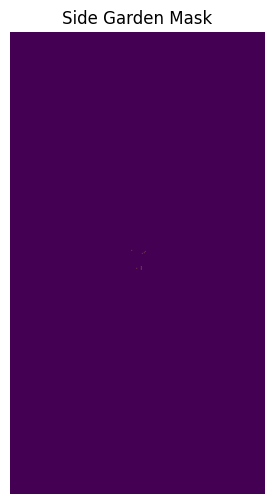

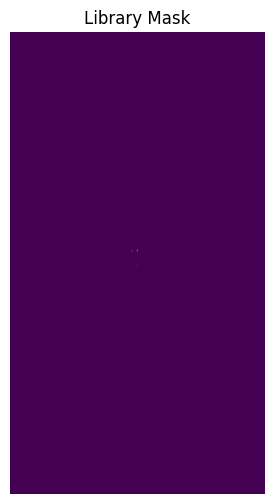

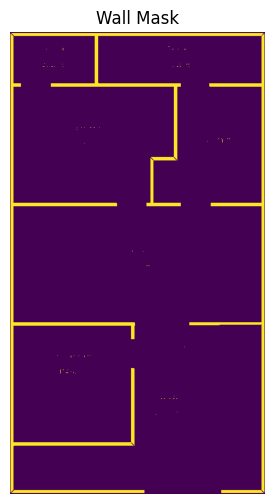

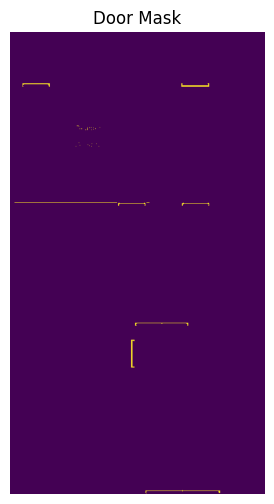


📌 **Detected Rooms & Areas:**
✅ Bedroom: 310.66 sq ft (69036 pixels)
✅ Bathroom: 64.62 sq ft (14361 pixels)
✅ Kitchen: 189.36 sq ft (42080 pixels)
✅ Drawing Room: 241.39 sq ft (53643 pixels)
✅ Garage: 322.27 sq ft (71616 pixels)
✅ Lounge: 511.24 sq ft (113608 pixels)
✅ Stairs: 124.6 sq ft (27689 pixels)
✅ Passage: 0.07 sq ft (16 pixels)
✅ Side Garden: 0.04 sq ft (9 pixels)
✅ Library: 0.03 sq ft (7 pixels)
✅ Wall: 132.57 sq ft (29461 pixels)
✅ Door: 5.44 sq ft (1209 pixels)

📌 **Extracted Metadata from Filename:**
✅ Plot Size: 5Marla
✅ Floor Level: GF
✅ Plan Type: FP
✅ Floor Plan Number: 002
✅ Version: V01

📌 **Complete Metadata JSON:**
{
    "PlotSize": "5Marla",
    "FloorLevel": "GF",
    "PlanType": "FP",
    "FP_Number": "002",
    "Version": "V01",
    "ImageDimensions": {
        "Width": 512,
        "Height": 928
    },
    "DPI": 96,
    "AspectRatio": 0.552,
    "ScalingFactor": 0.0045,
    "ProcessingDate": "2025-01-31T21:26:04.365613",
    "DetectedRooms": [
        "Bedro

In [ ]:
process_floor_plan(image_path)